# Занятие 2.
## Файлы, документы, Json, markdown, latex, office

Файлы будут нужны вам всегда. В первую очередь для того, чтобы запоминать какую-либо информацию, которая пригодится, когда ваша программа закончит выполнение. Во-вторых, потому что в оперативную память все не влезет (а ведь именно там хранится все, что использует ваша программа).

Обычно программисты работают с файловой системой Unix, но большая часть сказанного перекладывается и на windows.

---
### Операции с файлами, права

Обычно от вас требуется либо чтение файла, либо запись в файл. Еще файлы можно исполнять, но это другая история, которая сейчас нас не очень интересует.

Про права достаточно знать то, что если у вас нет прав на чтение, то вы не просмотрите файл, а если нет прав на запись, то не сможете его изменить. Следите за тем, чтобы они были.

In [1]:
with open('test.txt', 'w') as f:
    f.write('kek\n')
    f.write('lol\n')
    f.write('arbidol\n')

In [2]:
with open('test.txt', 'r') as f:
    print(f.read())

kek
lol
arbidol



In [4]:
# error expected
# try:
with open('test.txt', 'r') as f:
    f.write('kek\n')
# except:
#     print('Я же говорил - следи за правами!')

UnsupportedOperation: not writable

## Форматы для передачи данных

Мы сейчас обсудим кучу разных форматов. Они используются для разной передачи не-мультимедиа данных (про картинки, видео и аудио можете сделать самостоятельное исследование).

Общий план работы с данными --- это сначала выяснение, в каком формате нам хочется работать, после чего можно сделать гугл-запрос "format + python", и найти библиотеку, которая делает то, что вам нужно, по первой ссылке в гугле.

### JSON
Json - это такой формат, в котором можно записать любые данные (за что его все, собственно, и любят). Он строится через набор сущностей:
* Число
* Строка
* Массив, в котором хранится сколько-то однотипных сущностей
* Объект, который хранит сколько-то полей. У поля есть название-строка и значение-сущность.

Получается, что json-ом можно описать данные любого уровня вложенности.
И это очень похоже на объявление словарей в питоне.

Обычно этот формат используется для передачи данных в интернете

In [6]:
import json
json_data = {
    'items': [
        {
            'name': 'Apple',
            'value': {
                'cost': 13.50,
                'quantity': 4
            }
        },
        {
            'name': 'Book',
            'value': {
                'cost': 24,
                'quantity': 2
            }
        }
    ]
}

json.dump(json_data, open('test.json', 'w'), indent=True)
json.dumps(json_data) #returns str

'{"items": [{"name": "Apple", "value": {"cost": 13.5, "quantity": 4}}, {"name": "Book", "value": {"cost": 24, "quantity": 2}}]}'

In [7]:
json_data = json.loads('[{"name": "Apple", "value": {"cost": 13.5, "quantity": 4}}]')
print('quantity of apples:', json_data[0]['value']['quantity'])
json_data

quantity of apples: 4


[{'name': 'Apple', 'value': {'cost': 13.5, 'quantity': 4}}]

### XML, HTML

Это два однотипных языка, которые собраны на основе **тегов**. А именно, с помощью вложенной системы `<tag> ... </tag>` можно выделить какой-то блок.

Я с этим форматом работаю достаточно мало. Его основной принцип -- создать древовидную структуру (кажется, в вебе это любят называть [DOM](https://ru.wikipedia.org/wiki/Document_Object_Model). XML является аналогом JSON, проигравшим гонку стандарта передачи данных в вебе, а HTML используется для разметки сайтов.

Мы в будущем, возможно, будем их использовать, но я сходу не знаю, что с ними можно хорошего сделать

In [8]:
import xml.etree.ElementTree as xml
note = xml.fromstring('''<note>
<to>Tove</to>
<from>Jani</from>
<heading>Reminder</heading>
<body>Don't forget me this weekend!</body>
<item><name>First item</name></item>
<item><name>Second item</name></item>
</note>''')
note.tag

'note'

In [9]:
note.find('to').tag

'to'

In [10]:
note.find('body').text

"Don't forget me this weekend!"

In [11]:
note.findall('item')[0].find('name').text

'First item'

## Форматы для рабты с документами

Вообще, я выработал примерно такое правило по работе с документами. Если ваш заказчик не является отвратительным человеком со странными требованиями, работайте с чем-нибудь, что конвертируется в pdf.

**Почему?** Потому что в большинстве документов нужна *верстка* -- расположение элементов друг относительно друга визулально приемлемым образом. И (о ужас!) все с чем я работал, кроме pdf, не сохраняет верстку от устройства к устройству. Или просто не открывается.

Помните, как кто-то делал презентацию в libreoffice, а потом открывал ее в powerpoint, и половина текста оказывалась за пределами слайда? Вот это оно.

Альтернативно можно вместо документов делать веб-странички, но в большинстве случаев это не то, что вам нужно

### Markdown

Markdown -- такой текстовый язык, который помогает писать большие файлы с текстом, умеет редактировать их характеристики, а также превращаться в html или pdf одним кликом

`Этот _формат_ **используется** <strike>в Jupyter-notebook</strike>`

Этот _формат_ **используется** <strike>в Jupyter-notebook</strike>

Чтобы конвертировать такого рода языки в пригодные для использования документы, надо искать какие-нибудь утилиты (по типу https://pandoc.org/demos.html) или библиотеки (по типу https://github.com/trentm/python-markdown2)

Основные применения -- README, jupyter-notebook-like тетрадки, кастомные статьи. Говорят, можно на основе Markdown делать презентации (см. [marp](https://marp.app/)), но у меня руки так и не дошли. Главный плюс - вам не надо думать и концентрироваться на верстке, а результат приемлемый в 90% случаев.

In [12]:
!pip install markdown2

In [13]:
import markdown2
markdown2.markdown('''Этот _формат_ **используется** <strike>в Jupyter-notevook</strike>

* Первый выпадающий элемент
* Второй выпадающий элемент

''')

'<p>Этот <em>формат</em> <strong>используется</strong> <strike>в Jupyter-notevook</strike></p>\n\n<ul>\n<li>Первый выпадающий элемент</li>\n<li>Второй выпадающий элемент</li>\n</ul>\n'

Видите? это честный html документ, который мы получили почти бесплатно

Мой любимый пример - на markdown написана [algorithmica](https://algorithmica.org/ru/). Исходники можно посмотреть [тут](https://github.com/algorithmica-org/ru)

## Latex
Latex был сделан для ОЧЕНЬ умной верстки документов, а также для математических формул. Скорее всего, в нем вы сделаете свое резюме. Все остальное будет не очень полезным, если вы не техаете домашки. Если техаете домашки -- вы не будете из него вылезать. Я в какой-то момент вообще перестал конспектировать руками и перешел полностью вот в эти страшные `\displaystyle \int_{\frac{1}{x}}^{x^2} e^{-x^2} dx`

$$\displaystyle \int_{\frac{1}{x}}^{x^2} e^{-x^2} dx$$

Опять же, это не то, что вам нужно в питоне; вам это может быть нужно в каких-то абстрактных штуках. я нашел вот такой модуль https://www.geeksforgeeks.org/pylatex-module-in-python/, но мне проще по старинке генерировать из текста, давайте я вам покажу математические приколы

`$$\frac{x^2}{12} = 12 \Rightarrow x = \pm 12$$`

$$\frac{x^2}{12} = 12 \Rightarrow x = \pm 12$$

Вообще, и маркдаун и латех поддерживают отображение кода, что делает их удобным для прогерских домашек. Я не смог заставить юпитер сделать код в латехе, но помню, что можно использовать пакеты `lstlisting` или `minted`

    #include <iostream>

    int main() {
        int n;
        std::cin >> n;
        std::cout << n;
        return 0;
    }

<img src="latex-beamer-minted.png" width="500dp"></img>

В остальном, структура опять же вложенная, просто теги выглядят по-другому:

`\begin{enumerate}
\item \text{первый элемент}
\item second element
\end{enumerate}`

1. первый элемент
2. second element

Это вам лучше расскажет туториал по latex, а не я (все-таки латех достаточно сложный) --- главное знать, что тут вся работа с математикой и программированием, которая только вам может понадобиться

### Office: excel

Нашел вот тут большой гайд.
https://codecamp.ru/blog/python-excel-tutorial/

Давайте создадим какую-нибудь табличку с данными из массива и поверх график наклеим

https://github.com/Khan/openpyxl/blob/master/doc/source/tutorial.rst
https://openpyxl.readthedocs.io/en/stable/charts/line.html

In [14]:
from openpyxl import Workbook
from math import exp

wb = Workbook()
ws = wb.worksheets[0]
ws.title = "Some Data"
for i in range(1, 11):
    d = ws.cell(row = i, column = 1)
    d.value = exp(0.5 * i)

In [15]:
from openpyxl.chart import (
    LineChart,
    Reference,
)
from openpyxl.chart.axis import DateAxis

c1 = LineChart()
c1.title = "Exp"
c1.style = 13
data = Reference(ws, min_col=1, min_row=1, max_col=1, max_row=10)
c1.add_data(data, titles_from_data=True)
ws.add_chart(c1, "C12")


In [18]:
wb.save('exp.xlsx')

Можно видеть, что получилась вот такая штука:

<img src="table.png" width=400>

## JPEG

Картинки удобно представлять в качестве двумерного массива, а работать с ними очень несложно --- достаточно просто понять, с каким местом таблички нужно работать

https://pillow.readthedocs.io/en/stable/reference/Image.html

In [19]:
from PIL import Image
import PIL
pic = Image.new('RGB', (500, 500))
for i in range(250):
    for j in range(250):
        pic.putpixel((i, j), (0, 0, 50))
        pic.putpixel((i + 250, j), (0, 100, 50))
        pic.putpixel((i, j + 250), (100, 0, 50))
        pic.putpixel((i + 250, j + 250), (100, 100, 50))
pic.show()

In [29]:
import requests
from io import BytesIO

url = 'https://www.kaggle.com/static/images/datasets/Datasets_landing_illo.png'
response = requests.get(url)
img = Image.open('table.png')

In [30]:
img.show()

## MP3

Музыка - это типичный временной ряд. Обычно их представляют в виде массива, где каждый момент времени - это одна ячейка. В случае с видео это будет одна картинка. В случае с аудио - текущее напряжение на динамике. Если вкратце, то звук генерируется волной, поэтому на динамик нужно подавать попеременно разное напряжение, чтобы мы что-то слышали. Чем больше значение и чем чаще мы меняем напряжение, тем громче и тоньше звук соответственно.

Я бы не сказал, что между mp3 и wav есть какая-то глобальная разница для нас, как для не-специалистов. И то, и то, вам библиотека распарсит одинаково

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd
from pydub import AudioSegment
import math
%matplotlib inline
fs = 44100

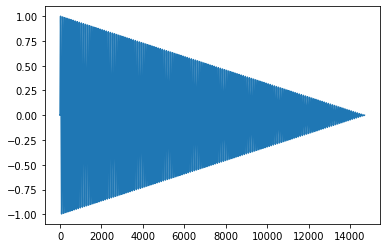

<_io.BufferedRandom name='volume.mp3'>

In [33]:
data = np.ndarray(1)
data[0] = 0
V = 1
it = 0
num = fs // 3
while V > 0:
    data = np.append(data, [V * math.sin(2 * math.pi * 440 * it / fs)]) 
    V -= 1 / num
    it += 1
sd.play(data, fs)
sd.wait()

fig = plt.figure()
plt.plot(data)
plt.show()
fig.savefig('output.png')

sf.write(data=data, file='volume.wav', samplerate=fs)
AudioSegment.from_wav('volume.wav').export('volume.mp3', format='mp3')

Можно посмотреть, как я когда-то захардкодил [код, играющий розовую пантеру](https://github.com/KiK0S/MLLP/blob/master/generate_pink_panther.ipynb)

## Про другое

Про word и powerpoint можно либо почитать отдельно, либо принять для себя решение, что вы ими никогда не пользуетесь, а все делаете в pdf. Тогда вы опять способны все сделать с 
помощью latex и markdown.

Мне случалось единожды делать такой проект. Нужно было сделать 450 обращений к депутатам Госдумы, поэтому я занимался подстановкой данных в ворде. Не самое приятное занятие, потому что там данные не особо структурированы и хранятся в непонятном блочном формате

Видео-картинки-аудио-книжки и прочее может быть в любом формате, просто надо найти под него читалку

## Домашнее задание

Тут, конечно, такая тема, что особо не разгуляешься.

* Табло для морского боя в экселе. Играете из консоли, но можно вывести табло + вы не потеряете результат игры.
* Утилита для быстрого крафта презентации из тезисов. На вход -- текстовый файл с описанием презентации (заголовки + тело слайда). На выход -- презентация, собранная из этого текста, с картинками-мемами. Можете заранее скачать архив мемов
* Смешной преобразователь текстовых документов -- такой, чтоб везде ставил смешные междометия
* Можно изучить какой-нибудь аудио-форматы и написать либо генератор мелодий, либо парсер и проигрыватель MIDI
* Можно применять фильтр к фоткам (см. photo booth effects), а можно крепить к ним смешной текст с помощью https://www.geeksforgeeks.org/python-pillow-writing-text-on-image/
* Утилита, которая делает графики в ваших эксель-таблицах за вас (по набору нужных столбцов).